In [1]:
import os
import tensorflow as tf
import numpy as np

import sys
sys.path.append(os.path.join("src/"))


from prepare_dataset.prepare_dataset import get_data_paths_and_labels_from_machine as get_data_from_machine
from preprocess.pd_preprocess import get_specific_data, get_flatten_data, get_label_from_flatten_specifics, get_dataframe_from_flatten_data_and_label, put_mel_from_dataframe
from utils.utils_general import save_dataframe

from preprocess.submodule.file_to_vector import file_to_vector_mel
from preprocess.submodule.normalize import min_max_normalization
from models.submodule.autoencoder import AutoEncoder
# from train_and_eval.submodule.predict import predict_only_autoencoder
from train_and_eval.submodule.metric import get_mse

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

import pandas as pd


2024-07-09 15:39:48.995723: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-09 15:39:49.018554: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 15:39:49.018573: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 15:39:49.019185: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-09 15:39:49.022865: I tensorflow/core/platform/cpu_feature_guar

Initializeing prepare_dataset...


In [2]:
data_paths, labels = get_data_from_machine("fan")

base_dir is  /mnt/d/silofox/paad/anomaly-example/exploring-AAD/notebooks/data
['data', 'DCASE', '2020', 'dev', 'fan', 'train']
['data', 'DCASE', '2020', 'dev', 'fan', 'test']
['data', 'DCASE', '2020', 'eval', 'fan', 'test']
['data', 'DCASE', '2020', 'add', 'fan', 'train']
['data', 'DCASE', '2021', 'dev', 'fan', 'train']
['data', 'DCASE', '2021', 'dev', 'fan', 'test']
['data', 'DCASE', '2021', 'eval', 'fan', 'test']
['data', 'DCASE', '2021', 'add', 'fan', 'train']
['data', 'DCASE', '2022', 'dev', 'fan', 'train']
['data', 'DCASE', '2022', 'dev', 'fan', 'test']
['data', 'DCASE', '2022', 'eval', 'fan', 'test']
['data', 'DCASE', '2022', 'add', 'fan', 'train']
['data', 'DCASE', '2023', 'dev', 'fan', 'train']
['data', 'DCASE', '2023', 'dev', 'fan', 'test']
['data', 'DCASE', '2024', 'dev', 'fan', 'train']
['data', 'DCASE', '2024', 'dev', 'fan', 'test']
['data', 'MIMII', 'data_-6_db', 'fan', 'id_00', 'normal']
['data', 'MIMII', 'data_-6_db', 'fan', 'id_00', 'abnormal']
['data', 'MIMII', 'data_-

In [3]:
data_paths = get_specific_data(data_paths)
labels = get_specific_data(labels)

In [4]:
data_paths = get_flatten_data(data_paths)

In [5]:
labels = get_label_from_flatten_specifics(data_paths, labels)

In [6]:
df = get_dataframe_from_flatten_data_and_label(data_paths, labels)

In [7]:
# df = put_mel_from_dataframe(df)
df = pd.read_pickle("tmp/df_processed.pkl")

In [8]:
df.head()

,filename,label,type,model,mel
0,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,"[[-4.065266, -3.8633952, -8.739636, -7.2820454..."
1,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,"[[-7.9840016, -4.3109107, -2.7375526, -0.82489..."
2,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,"[[-8.699673, -4.9045453, -6.1882453, -8.75579,..."
3,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,"[[-11.748176, -10.067834, -7.39743, -5.736805,..."
4,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,0,"[[-8.339684, -2.4204457, -1.6291256, -2.462088..."


In [9]:
df.tail()

,filename,label,type,model,mel
5545,/mnt/d/silofox/paad/anomaly-example/exploring-...,-1,fan,6,"[[-19.18564, -15.14227, -13.377649, -15.827193..."
5546,/mnt/d/silofox/paad/anomaly-example/exploring-...,-1,fan,6,"[[-18.358322, -14.469301, -11.691223, -12.1494..."
5547,/mnt/d/silofox/paad/anomaly-example/exploring-...,-1,fan,6,"[[-6.846507, -5.096464, -5.3933787, -7.791261,..."
5548,/mnt/d/silofox/paad/anomaly-example/exploring-...,-1,fan,6,"[[-19.121777, -17.3965, -16.490322, -12.980328..."
5549,/mnt/d/silofox/paad/anomaly-example/exploring-...,-1,fan,6,"[[-8.908147, -7.5657873, -8.729336, -6.718759,..."


In [10]:
# df.to_pickle("tmp/df_processed.pkl")

In [11]:
df_old = pd.read_pickle("tmp/df.pkl")

In [12]:
df_old.head()

,filename,label,type,model,mel,train,test
0,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,4,"[[-7.5002937, -4.639111, -6.0516047, -4.391639...",1,1
1,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,4,"[[-12.436094, -9.041126, -3.7102282, -1.664873...",0,1
2,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,4,"[[-9.425446, -5.0984335, -6.3233995, -8.37207,...",1,1
3,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,4,"[[-6.7651253, -3.5295246, -5.626698, -6.813489...",1,1
4,/mnt/d/silofox/paad/anomaly-example/exploring-...,1,fan,4,"[[-10.678015, -6.4591193, -6.473288, -9.170168...",0,1


In [13]:
len(df_old)

1381

# visualize 먼저

In [14]:
sample_1_path = df.iloc[0]["filename"]

In [15]:
from utils.submodule.load_audio import load_audio

In [29]:
audio_data, sample_rate = load_audio(sample_1_path)

In [17]:
audio_data

tensor([[-0.0039, -0.0029, -0.0032,  ...,  0.0127,  0.0140,  0.0134]])

In [18]:
audio_data.shape

torch.Size([1, 160000])

In [19]:
# from utils.submodule.audio_to_img import plot_waveform

In [24]:
squeeze_data = np.squeeze(audio_data)

In [25]:
squeeze_data.shape

torch.Size([160000])

In [60]:
import matplotlib.pyplot as plt

DURATION = 10
SAMPLING_RATE = 16000

def plot_waveform (waveform, duration = DURATION, sampling_rate = SAMPLING_RATE, is_normalize = True) :
    time = np.linspace(0., duration, sampling_rate * duration)
    if not is_normalize :
        # epsilon = 1e-9
        # waveform = 20 * np.log10(np.abs(waveform) + epsilon)
        waveform[waveform == 0] = waveform.mean()
        waveform = 20 * np.log10(np.abs(waveform))
    else :
        waveform = np.squeeze(waveform)
    
    plt.figure(figsize=(10, 4))
    plt.plot(time, waveform)
    plt.title("Audio Waveform in Time Domain")
    plt.xlabel("Time [s]")
    if not is_normalize :
        plt.ylabel("Amplitude [dB]")
    else : 
        plt.ylabel("Amplitude")
    plt.show()

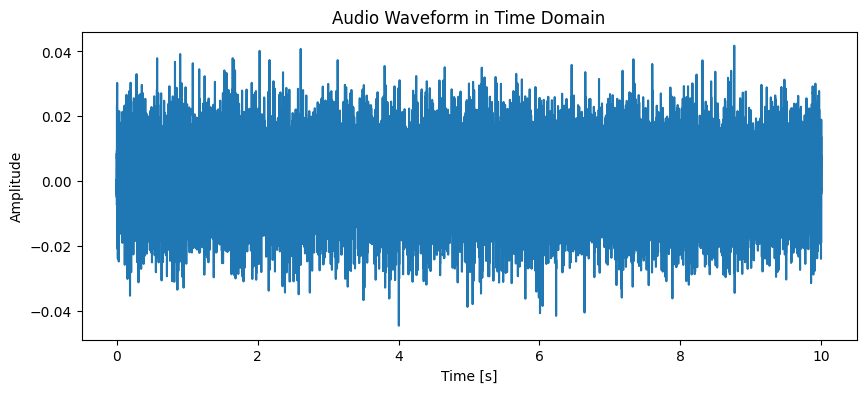

In [50]:
plot_waveform(audio_data) # normalize 된 값

In [30]:
import torchaudio

In [33]:
raw_audio, sample_rate = torchaudio.load(sample_1_path, normalize = False)

In [35]:
raw_audio.shape

torch.Size([8, 160000])

In [37]:
raw_audio[0] # 16 bit PCM sample 값 -32768 ~ 32767

tensor([-150, -184, -274,  ...,   93,  215,  236], dtype=torch.int16)

In [40]:
raw_audio_float = raw_audio.float()
mono_audio = raw_audio_float.mean(dim=0)

In [41]:
mono_audio

tensor([-128.1250,  -93.7500, -103.8750,  ...,  414.7500,  459.5000,
         440.5000])

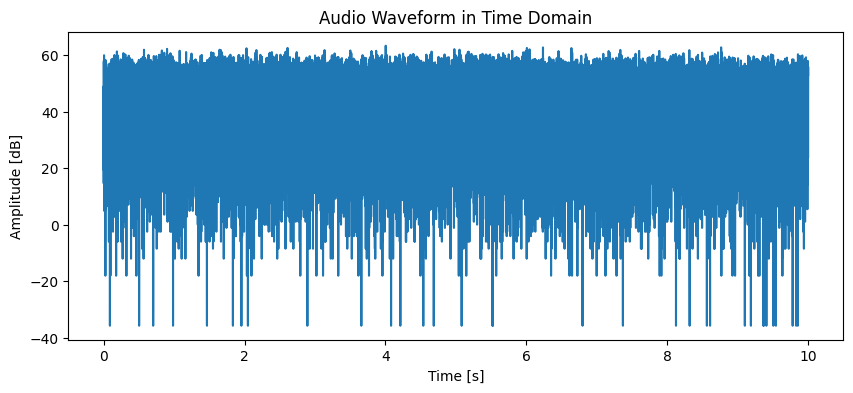

In [61]:
plot_waveform(mono_audio, is_normalize = False) # 8 채널 평균의 waveform

In [65]:
from scipy.fft import fft, fftfreq

def plot_waveform_freq (waveform, duration = DURATION, sampling_rate = SAMPLING_RATE, is_normalize = True) :
    waveform = np.squeeze(waveform).numpy()

    N = sampling_rate * duration
    yf = fft(waveform)
    xf = fftfreq(N, 1 / sampling_rate)
    
    if not is_normalize :
        # epcilon = 1e-9
        # yf = 20 * np.log10(np.abs(yf) + epcilon)
        yf[yf == 0] = yf.mean()
        yf = 20 * np.log10(np.abs(yf))

    plt.figure(figsize=(10, 4))
    plt.plot(np.abs(xf), np.abs(yf))
    plt.title("Audio Waveform in Frequency Domain")
    plt.xlabel("Frequency [Hz]")
    if not is_normalize :
        plt.ylabel("Amplitude [dB]")
    else :
        plt.ylabel("Amplitude")
    plt.show()

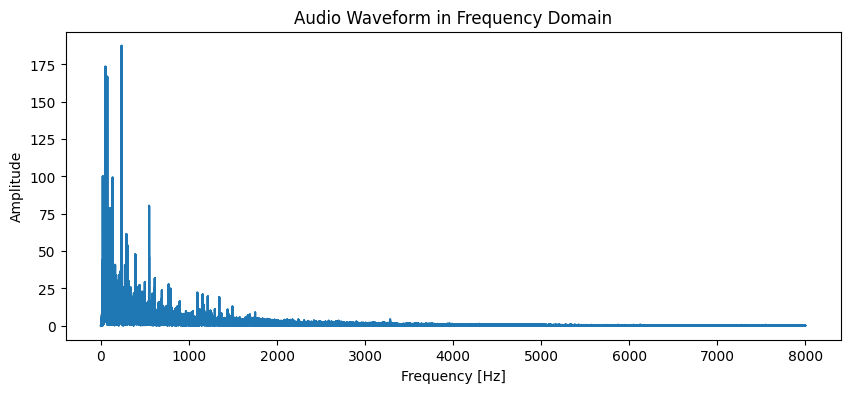

In [66]:
plot_waveform_freq(audio_data) # normalize 된 값

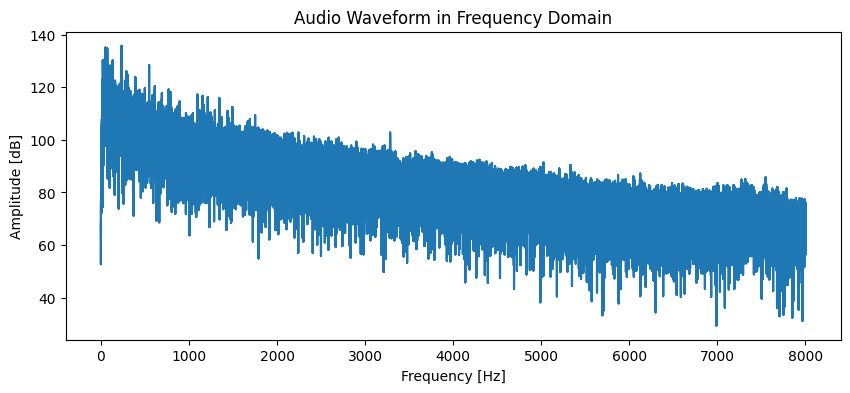

In [67]:
plot_waveform_freq(mono_audio, is_normalize = False) # 8 채널 평균의 waveform

In [68]:
from preprocess.submodule.file_to_vector import file_to_vector_mel

In [69]:
mel_data = file_to_vector_mel(sample_1_path)

In [71]:
mel_data.shape

(64, 313)

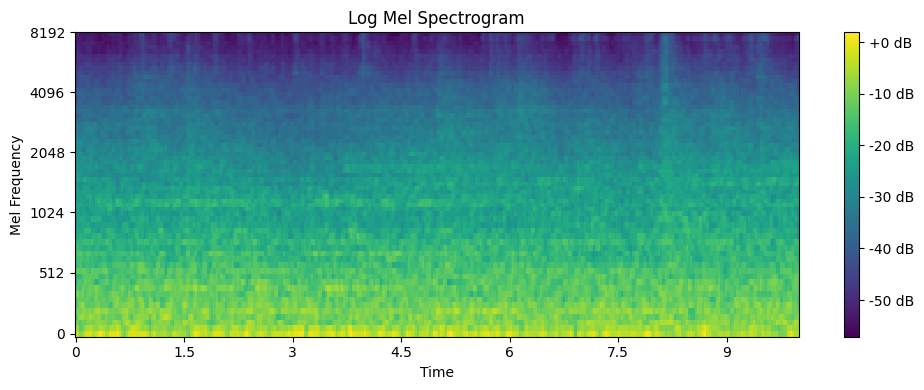

In [72]:
import matplotlib.pyplot as plt
import librosa.display

# log_mel_spectrogram을 시각화하는 함수
def display_log_mel_spectrogram(log_mel_spectrogram, sr = 16000, hop_length = 512):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(log_mel_spectrogram,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis='time',
                             y_axis='mel',
                             cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Log Mel Spectrogram')
    plt.xlabel('Time')
    plt.ylabel('Mel Frequency')
    plt.tight_layout()
    plt.show()

# 예제 사용
# log_mel_spectrogram, sr, hop_length 변수는 이미 정의되어 있다고 가정
display_log_mel_spectrogram(mel_data)

In [87]:
import speechpy

def plot_lmfe_with_mel (mel_data, title, ylabel="freq_bin", sr=16000, n_fft=2048, typ='fan'):
    fig, ax = plt.subplots(figsize=(10, 10))
    path = f'lmfe_{typ}_sample'
    n_fft = n_fft
    n = 81
    ax.set_title(title)
    ax.set_yticks([])
    ax.label_outer()
    ax.set_xticks([])
    im = librosa.display.specshow(mel_data, x_axis='time', y_axis="log", ax=ax)
    ax.tick_params(axis='both', which='both', bottom=False, left=False)
    ax.tick_params(axis='both', which='both', bottom=False, left=False)
    ax.set_ylabel('log Mel-frequency')
    plt.colorbar(im, ax=ax)
    plt.show()

def plot_lmfe(waveform, title, ylabel="freq_bin", sr=16000, n_fft=2048, typ='fan'):
    fig, ax = plt.subplots(figsize=(10, 10))
    path = f'lmfe_{typ}_sample'
    n_fft = n_fft
    n = 81
    # Compute log mel energy
    y = waveform[0].numpy()
    lmfe = speechpy.feature.lmfe(y, sr, fft_length=n_fft, frame_length=1, frame_stride=(0.75), num_filters=n).T

    ax.set_title(title)
    ax.set_yticks([])
    ax.label_outer()
    ax.set_xticks([])
    im = librosa.display.specshow(lmfe, x_axis='time', y_axis="log", ax=ax)
    # Remove ticks from inner subplots
    ax.tick_params(axis='both', which='both', bottom=False, left=False)
    ax.tick_params(axis='both', which='both', bottom=False, left=False)

    ax.set_ylabel('log Mel-frequency')
    plt.colorbar(im, ax=ax)

    # plt.savefig('figs/' + path + ".png", transparent=True, dpi=400)
    plt.show()


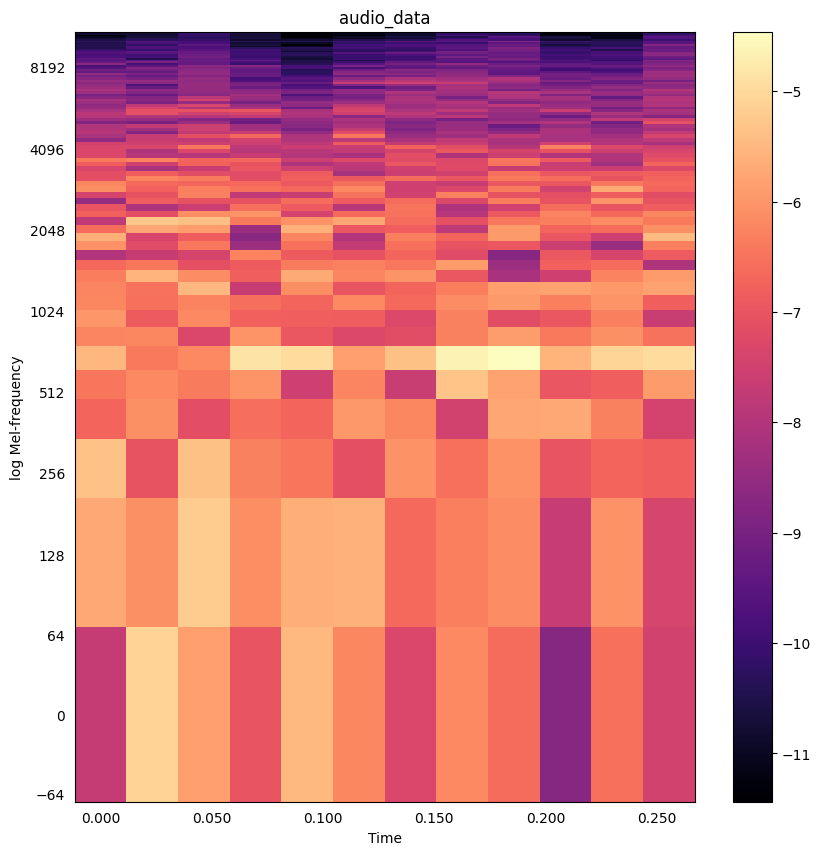

In [86]:
plot_lmfe(audio_data, "audio_data")

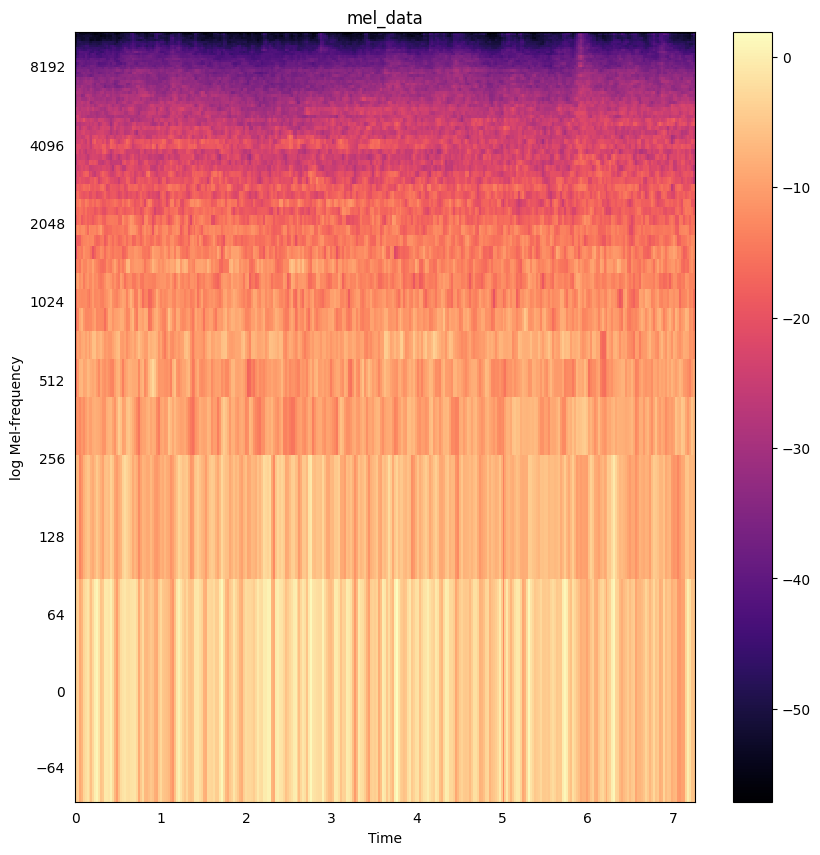

In [88]:
plot_lmfe_with_mel(mel_data, "mel_data")